# Simulation  d'EDO en Python

**Marc BUFFAT, Université Claude Bernard Lyon 1**

In [8]:
%matplotlib inline
# bibliotheques de base
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
from IPython.core.display import HTML

## EDO du 1er ordre

Soit l'EDO

 $$ \frac{dy}{dt} = a y(t) \mbox{ avec } y(0)=1$$

### Méthode d'Euler

 $$ y^{n+1} = ( 1 +  a \Delta t)\,  y^n $$


#### programmation
 - mise sous forme générique
 
 $$ \frac{dy}{dt} = f(y,t) $$
 
 - paramètres : 
 
    - fonction $f(y,t)$, 
    - C.I. $y_0$, 
    - temps final $t_f$
    - pas en temps $dt$
    
 - calcul itératif 
 
 à $t^{n+1}= t^n + dt$
 
 $$ y^{n+1} = y^n + dt f(y^n,t^)$$
 
 - analyse de la précision
   - calcul solution pour différents $dt=1,0.1,0.01$
   - calcul de l'erreur avec $y_e=e^{at}$
   - comportement pour différentes valeurs de $a=0.2,1,2$
 
#### fonction générique Euler
écriture d'une fonction générique dépendant des paramètres

       def Euler(f,y0,tf,dt):

In [13]:
# implementation méthode d'Euler
def Euler(f,y0,tf,dt):
    """Integration de dy/dt=f(y,t) par Euler 
       avec une CI y0 pendant tf avec un pas dt"""
    n = int(tf/dt)
    T = np.zeros(n+1)
    Y = np.zeros(n+1)
    Y[0] = y0
    T[0] = 0.0
    for i in range(n):
        Y[i+1] = Y[i] + dt*f(Y[i],T[i])
        T[i+1] = T[i] + dt
    return Y,T

#### calcul 2nd membre: fonction  F(y,t)

définition de la fonction second membre

$$ \frac{dy}{dt} = a y(t) \mbox{ avec } y(0)=1$$

      def F(y,t):

In [14]:
# second membre
def F(y,t):
    """2nd membre de l'EDO"""
    global a
    return a*y

#### trace la solution pour dt=1,0.1,0.01 et l'erreur:
$$ \frac{dy}{dt} = a y(t) \mbox{ avec } y(0)=1$$

      def tracesol(T1,Y1,T2,Y2,T3,Y3,titre): 

In [15]:
def tracesol(T1,Y1,T2,Y2,T3,Y3,titre):
    """trace solution et erreur"""
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title(titre)
    plt.plot(T1,Y1,'<-',label="dt=1")
    plt.plot(T2,Y2,'^-',label="dt=0.1")
    plt.plot(T3,Y3,'+-',label="dt=0.01")
    plt.legend()
    plt.subplot(1,2,2)
    plt.title("erreur relative |(uex-uh)/uex|")
    plt.semilogy(T1,np.abs(Y1-np.exp(a*T1))/np.exp(a*T1),label="Err1")
    plt.semilogy(T2,np.abs(Y2-np.exp(a*T2))/np.exp(a*T2),label="Err2")
    plt.semilogy(T3,np.abs(Y3-np.exp(a*T3))/np.exp(a*T3),label="Err3")
    plt.legend()
    return

#### Application
$$ \frac{dy}{dt} = a y(t) \mbox{ avec } y(0)=1$$

résolution avec différents dt et tracer de l'évolution de l'erreur

avec a=0.2 (facile) ou a=2.0 (cas difficile)

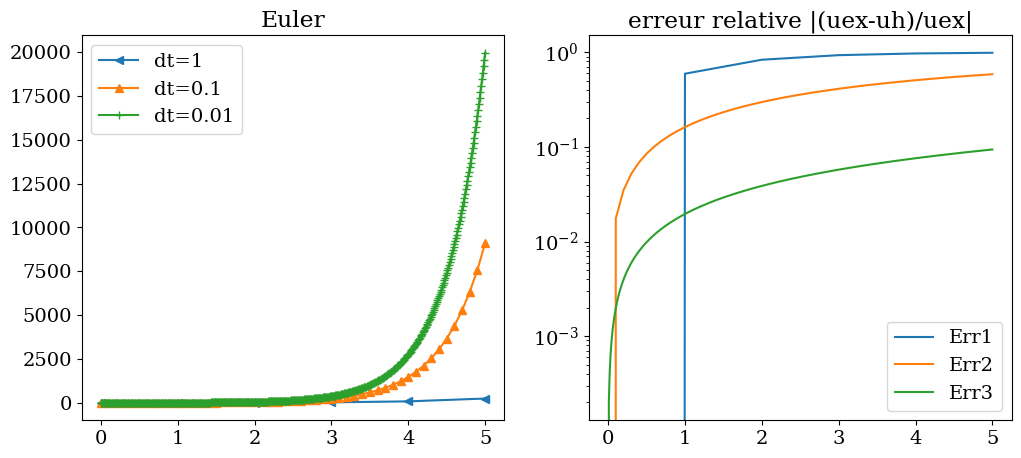

In [16]:
a=0.2 # cas facile
a=2.0 # cas difficile
# solution Euler
tf=5
y0=1.0
Y1,T1 = Euler(F,y0,tf,1.)
Y2,T2 = Euler(F,y0,tf,0.1)
Y3,T3 = Euler(F,y0,tf,0.01)
tracesol(T1,Y1,T2,Y2,T3,Y3,'Euler')

On constate que la méthode d'Euler est une méthode peu précise avec une accumulation d'erreur au cours du temps, dû à sa précision d'ordre 1. La décroissance de l'erreur en fonction de $dt$ est bien d'ordre 1 (sur la figure de droite, décroissance d'un facteur $10^1$ pour un $dt$ divisé par $10$)

### Méthode RungeKutta ordre 2
$$ y_{n+1} = y_n + \frac{dt}{2} (K_1+K_2) $$
$$ K_1 =f(t_n,y_n), K_2=f(t_n+dt,y_n+dtK_1) $$
#### fonction générique RK2
    def RK2(f,y0,tf,dt)

In [21]:
# implementation méthode RK2
def RK2(f,y0,tf,dt):
    """Integration de dy/dt=f(y,t) par Runge Kutta 2 
       avec une CI y0 pendant tf avec un pas dt"""
    n = int(tf/dt)
    T = np.zeros(n+1)
    Y = np.zeros(n+1)
    Y[0] = y0
    T[0] = 0.0
    for i in range(n):
        K1 = f(Y[i],T[i])
        K2 = f(Y[i]+K1*dt,T[i]+dt)
        Y[i+1] = Y[i] + (K1+K2)*dt/2.
        T[i+1] = T[i] + dt
    return Y,T

#### Application
$$ \frac{dy}{dt} = a y(t) \mbox{ avec } y(0)=1$$
résolution avec différents dt et tracer de l'évolution de l'erreur

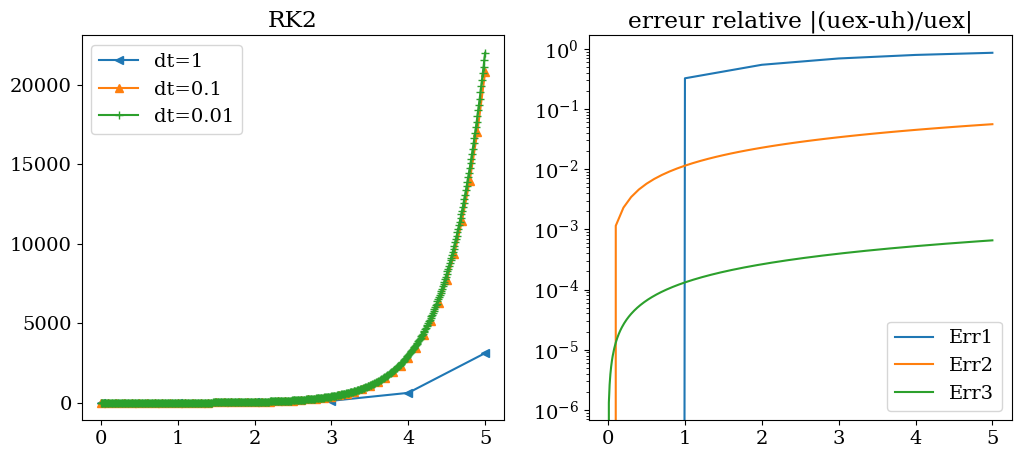

In [22]:
# solution RK2
tf=5
y0=1.0
Y1,T1 = RK2(F,y0,tf,1.)
Y2,T2 = RK2(F,y0,tf,0.1)
Y3,T3 = RK2(F,y0,tf,0.01)
# tracer solution et erreur
tracesol(T1,Y1,T2,Y2,T3,Y3,"RK2")

On constate que la solution est bien plus précise qu'avec la méthode d'Euler. La décroissance de l'erreur en fonction de $dt$ est bien d'ordre 2 (sur la figure de droite, décroissance d'un facteur $10^2$ pour un $dt$ divisé par $10$)

### Méthode RungeKutta ordre 4
$$ y_{n+1} = y_n + \frac{dt}{6} (K_1+2K_2+2K_3+K_4) $$
$$ K_1 =f(t_n,y_n), K_2=f(t_n+\frac{dt}{2},y_n+\frac{dt}{2}K_1) $$
$$ K_3=f(t_n+\frac{dt}{2},y_n+\frac{dt}{2}K_2) , K_4=f(t_n+dt,y_n+dt K_3) $$

#### fonction générique RK4
       def RK4(f,y0,tf,dt)

In [23]:
# implementation méthode RK4
def RK4(f,y0,tf,dt):
    """Integration de dy/dt=f(y,t) par Runge Kutta 4 
       avec une CI y0 pendant tf avec un pas dt"""
    n = int(tf/dt)
    T = np.zeros(n+1)
    Y = np.zeros(n+1)
    Y[0] = y0
    T[0] = 0.0
    for i in range(n):
        K1 = f(Y[i],T[i])
        K2 = f(Y[i]+K1*dt/2,T[i]+dt/2)
        K3 = f(Y[i]+K2*dt/2,T[i]+dt/2)
        K4 = f(Y[i]+K3*dt  ,T[i]+dt)
        Y[i+1] = Y[i] + (K1+2*K2+2*K3+K4)*dt/6
        T[i+1] = T[i] + dt
    return Y,T

#### Application
$$ \frac{dy}{dt} = a y(t) \mbox{ avec } y(0)=1$$
résolution avec différents dt et tracer de l'évolution de l'erreur

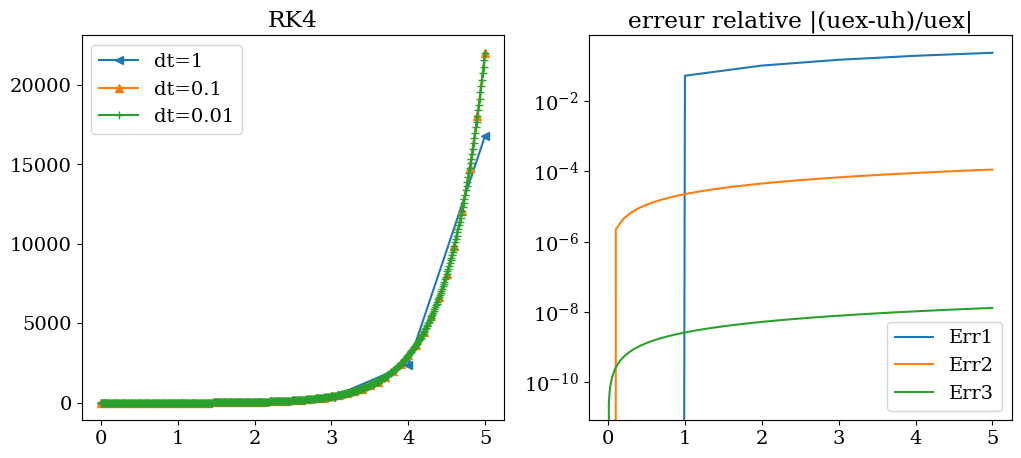

In [24]:
# solution RK4
tf=5
y0=1.0
Y1,T1 = RK4(F,y0,tf,1.)
Y2,T2 = RK4(F,y0,tf,0.1)
Y3,T3 = RK4(F,y0,tf,0.01)
# tracer solution et erreur
tracesol(T1,Y1,T2,Y2,T3,Y3,"RK4")

On constate que la solution est très précise mais avec de grand $dt$. La décroissance de l'erreur en fonction de $dt$ est bien d'ordre 4 (sur la figure de droite, décroissance d'un facteur $10^4$ pour un $dt$ divisé par $10$)

### Méthode implicite
- EDO
$$ \frac{dy}{dt} = f(y,t) $$

- schema implicite en temps
$$ \frac{y^{n+1}-y^n}{\Delta t} = f(y^{n+1},t^{n+1}) $$

- problème non linéaire pour $ \Delta y = y^{n+1}-y^n $

$$\frac{\Delta y}{\delta t} -  f(y^n + \Delta y, t^n + \Delta t)  = 0$$
- DL a l'ordre 1 avec la jacobienne $\frac{df}{dy}$

$$\frac{\Delta y}{\delta t} -  f(y^n , t^n + \Delta t) - \Delta y \frac{df}{dy}   = 0 $$

- généralisation avec un schema RK2 implicite

#### Calcule de la jacobienne $df/dy$

$$ \frac{dy}{dt} = a y(t) \mbox{ avec } y(0)=1$$


In [25]:
def dF(y,t):
    global a
    return a

#### Implementation RK2 implicite

$$ y_{n+1} = y_n + \frac{dt}{2} (f(t_n,y_n)+f(t_{n+1},y_{n+1})) $$

- calcul $\Delta y$ avec  $f(t_{n+1},y_{n+1})$ par DL avec $\Delta y = y_{n+1}-y_n $

$$\frac{\Delta y}{\Delta t} = f(t_{n+1},y_{n+1}) = f(t_{n+1},y_n) + \frac{df}{dy}\Delta y $$


In [96]:
#
def RK2i(f,y0,tf,dt):
    """Integration de dy/dt=f(y,t) par Runge Kutta 2 implicite
       avec une CI y0 pendant tf avec un pas dt"""
    n = int(tf/dt)
    T = np.zeros(n+1)
    Y = np.zeros(n+1)
    Y[0] = y0
    T[0] = 0.0
    for i in range(n):
        K1 = f(Y[i],T[i])
        DY = K1  / (1./dt - dF(Y[i],T[i]))
        K2 = f(Y[i]+DY,T[i]+dt)
        Y[i+1] = Y[i] + (K1+K2)*dt/2.
        T[i+1] = T[i] + dt
    return Y,T

#### Application (cas raide et non raide)

$$ \frac{dy}{dt} = a y(t) \mbox{ avec } y(0)=1$$

a=0.2  ou a= 2.0

a= 2.0


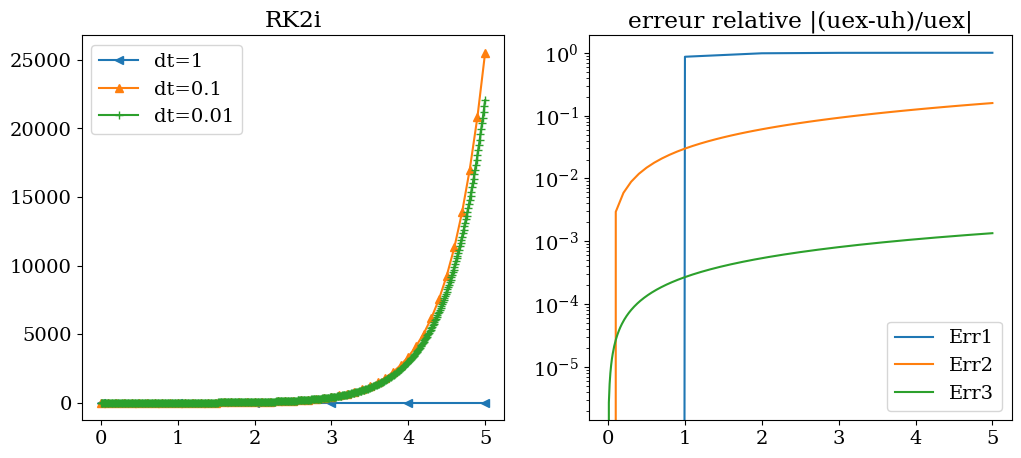

In [27]:
print("a=",a)
# solution RK2i
tf=5
y0=1.0
Y1,T1 = RK2i(F,y0,tf,1.)
Y2,T2 = RK2i(F,y0,tf,0.1)
Y3,T3 = RK2i(F,y0,tf,0.01)
# tracer solution et erreur
tracesol(T1,Y1,T2,Y2,T3,Y3,"RK2i")

La décroissance de l'erreur en fonction de $dt$ est bien d'ordre 2 (sur la figure de droite, décroissance d'un facteur $10^2$ pour un $dt$ divisé par $10$). Par contre, cette méthode n'apporte rien dans ce cas-là par rapport à une méthode RK2 explicite.

## Bibliothèque Scipy (méthode la plus complete)

- dans scipy.integrate  **ode** (version objet)

    - dopri5    RK4-5
    - dopri853  RK8
    - vode      implicite Adams (non raide) et BDF (raide)
    - lsoda     Adams Bashford et BDF

calcul automatique du pas en temps pour conserver une précision fixée
    
- attention à l'ordre des arguments pour F


### définition du 2nd membre (pour integrate.ode)

In [28]:
ncount = 0
def FF(t,y,a):
    """2nd membre de l'EDO"""
    global ncount
    ncount += 1
    return a*y

### Implementation solveODE

- interface avec integrate.ode

- cas facile et difficile

In [29]:
# solve with integrate.ode
from scipy import integrate
# cas de calcul (facile / difficile)
a = 0.2 
a = 2.0
def solveODE(F,y0,tf,dt,methode):
    """integration avec ode """
    global ncount,a
    ncount = 0
    # parametre
    n = int(tf/dt)
    T = np.linspace(0,tf,n+1)
    Y = np.zeros(n+1)
    Y[0] = y0   
    solver = integrate.ode(F, jac=None).set_integrator(methode)
    solver.set_initial_value(y0, T[0]).set_f_params(a)
    for i in range(1,n+1):
        if solver.successful():
            Y[i]=solver.integrate(T[i])
        else:
            print("Erreur ODE")
            exit
    print("SolveODE a={}: nbre de calcul de F = {}".format(a,ncount))
    return Y,T

### Application: schema RK ordre 4-5

SolveODE a=2.0: nbre de calcul de F = 312
SolveODE a=2.0: nbre de calcul de F = 657
SolveODE a=2.0: nbre de calcul de F = 3501


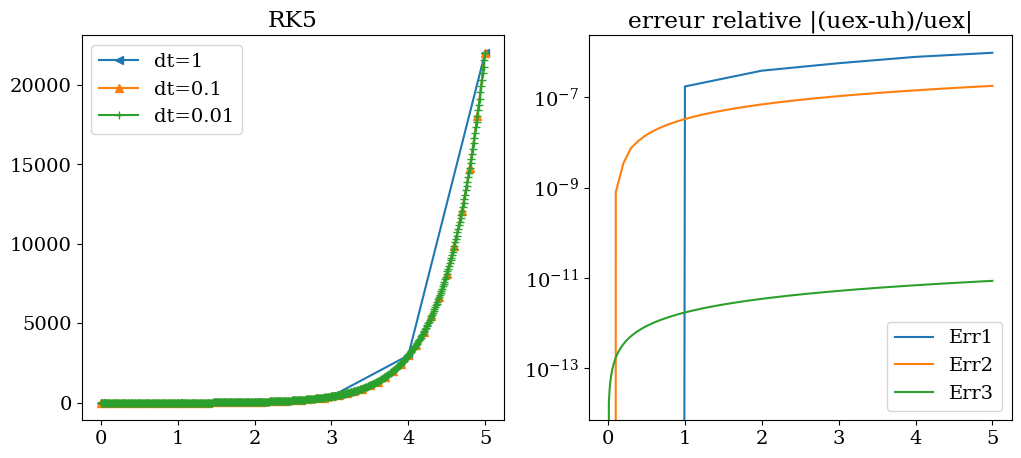

In [30]:
tf=5
y0=1.0
Y1,T1 = solveODE(FF,y0,tf,1.,'dopri5')
Y2,T2 = solveODE(FF,y0,tf,0.1,'dopri5')
Y3,T3 = solveODE(FF,y0,tf,0.01,'dopri5')
# tracer solution et erreur
tracesol(T1,Y1,T2,Y2,T3,Y3,"RK5")

On constate que l'utilisation de la bibliothèque **scipy ode** permet d'obtenir la solution la plus précise, car contrairement aux méthodes programmées précédemment, la fonction **ode** utilise
un ajustement automatique du pas en temps en calculant à chaque pas en temps 2 approximations de la solution : une avec une méthode RK4 et une avec une méthode RK5, ce qui permet d'ajuster  l'erreur d'intégration et de la maintenir en dessous d'un critère (ici $10^{-6}$) quelque que soit le pas en temps choisit pour avoir la solution. Attention, ce pas en temps ne correspond pas au pas d'intégration, mais au pas où on veut obtenir la solution.

### Application: schema RK ordre 8

la méthode la plus précise

SolveODE a=2.0: nbre de calcul de F = 149
SolveODE a=2.0: nbre de calcul de F = 740
SolveODE a=2.0: nbre de calcul de F = 7001


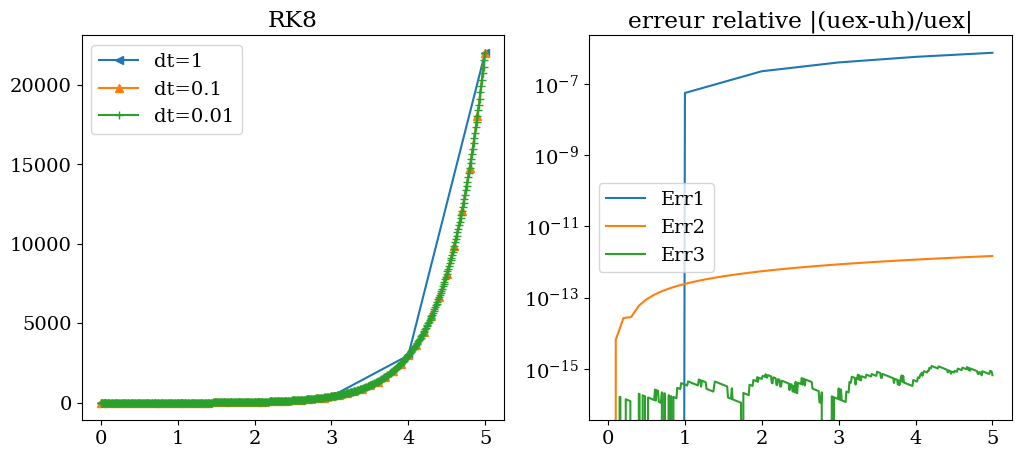

In [31]:
Y1,T1 = solveODE(FF,y0,tf,1.,'dop853')
Y2,T2 = solveODE(FF,y0,tf,0.1,'dop853')
Y3,T3 = solveODE(FF,y0,tf,0.01,'dop853')
# tracer solution et erreur
tracesol(T1,Y1,T2,Y2,T3,Y3,"RK8")

### Application: schema implicite Adams Bashford 

SolveODE a=2.0: nbre de calcul de F = 108
SolveODE a=2.0: nbre de calcul de F = 108
SolveODE a=2.0: nbre de calcul de F = 108


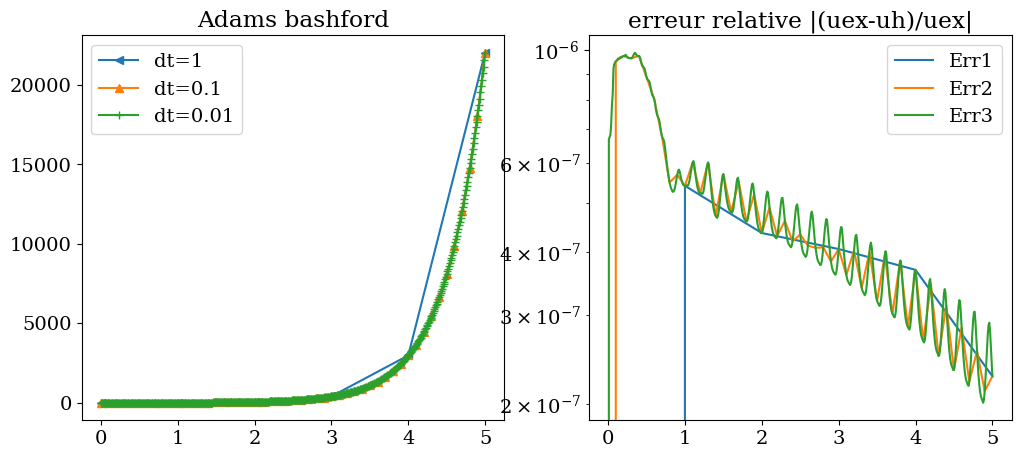

In [32]:
Y1,T1 = solveODE(FF,y0,tf,1.,'vode')
Y2,T2 = solveODE(FF,y0,tf,0.1,'vode')
Y3,T3 = solveODE(FF,y0,tf,0.01,'vode')
# tracer solution et erreur
tracesol(T1,Y1,T2,Y2,T3,Y3,"Adams bashford")

On constate que cette méthode couplée permet d'obtenir une erreur quasiment indépendante du pas en temps, mais qui est un peu moins bonne qu'avec RK45 

## Bibliothèque Scipy (méthode la plus simple)
- **odeint** dans scipy.integrate
  - la méthode la plus simple a utilisée
  - utilise la bibliotheque lsoda
  - adams bashford pour les cas non raides
  - BDF dans les cas raides

### Implémentation

In [46]:
# second membre
ncount = 0
def F(y,t,a):
    """2nd membre de l'EDO"""
    global ncount
    ncount += 1
    return a*y

Nbre de calcul de F = 171
Nbre de calcul de F = 171
Nbre de calcul de F = 171


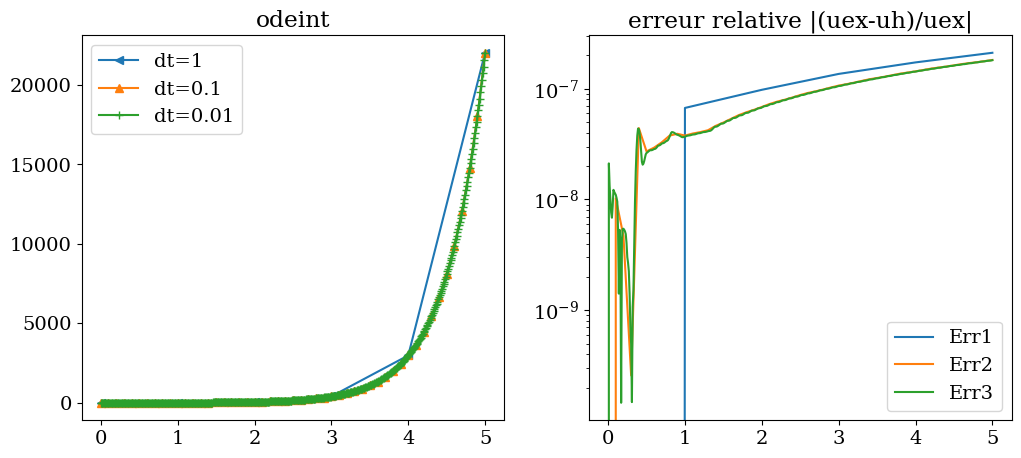

In [47]:
from scipy.integrate import odeint
# cas de calcul (facile / difficile)
a = 0.2 
a = 2.0
# parametres
n=5
ncount = 0
T1 = np.linspace(0,tf,n+1)
Y1 = odeint(F,y0,T1,args=(a,))
print("Nbre de calcul de F = {}".format(ncount))
ncount = 0
T2 = np.linspace(0,tf,10*n+1)
Y2 = odeint(F,y0,T2, args=(a,))
print("Nbre de calcul de F = {}".format(ncount))
ncount = 0
T3 = np.linspace(0,tf,100*n+1)
Y3 = odeint(F,y0,T3,args=(a,))
print("Nbre de calcul de F = {}".format(ncount))
# trace
tracesol(T1,Y1[:,0],T2,Y2[:,0],T3,Y3[:,0],'odeint')

On constate que **odeint** permet d'obtenir une erreur quasiment indépendante du pas en temps de l'ordre de $10^{-7}$, mais qui est un peu moins bonne qu'avec RK45 

### avec un contrôle de la précision

Nbre de calcul de F = 304
Nbre de calcul de F = 304
Nbre de calcul de F = 302


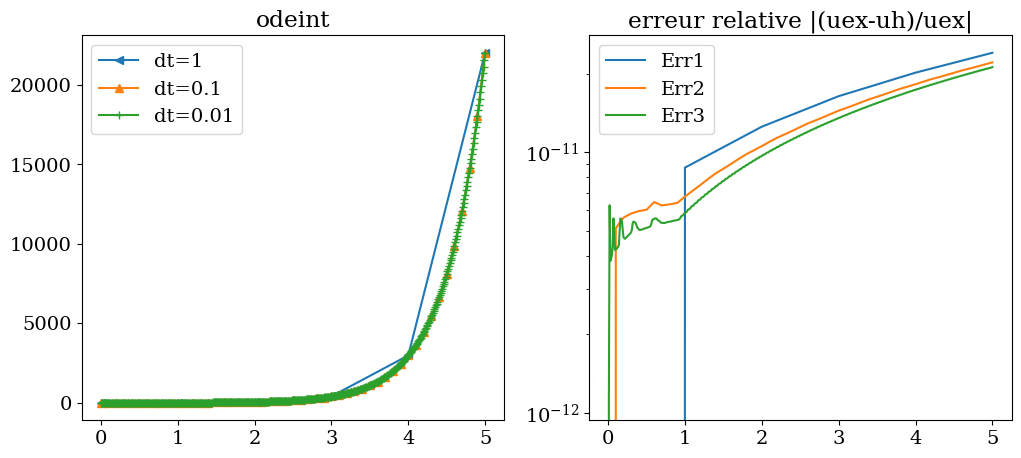

In [49]:
tol=1.0e-12
n=5
ncount = 0
T1 = np.linspace(0,tf,n+1)
Y1 = odeint(F,y0,T1,args=(a,),rtol=tol,atol=tol)
print("Nbre de calcul de F = {}".format(ncount))
ncount = 0
T2 = np.linspace(0,tf,10*n+1)
Y2 = odeint(F,y0,T2,args=(a,),rtol=tol,atol=tol)
print("Nbre de calcul de F = {}".format(ncount))
ncount = 0
T3 = np.linspace(0,tf,100*n+1)
Y3 = odeint(F,y0,T3,args=(a,),rtol=tol,atol=tol)
print("Nbre de calcul de F = {}".format(ncount))
# trace
tracesol(T1,Y1[:,0],T2,Y2[:,0],T3,Y3[:,0],"odeint")

C'est ce que l'on vérifie en imposant une précision plus grande $10^{-12}$ qui permet d'obtenir une erreur de l'ordre de $10^{-11}$ quel que soit $dt$ 

### Choix des méthodes
Pour résoudre une EDO, utilisation des fonctions de la bibliothèque **scipy**

 - pble simple : **odeint**
 - pble complexe: **ode**
 - attention à la précision par défaut

### Application: modélisation d'une population
$$ \frac{dy}{dt} = a y (1 +\sin \omega t) $$

avec $a$ le taux de reproduction et $\sin \omega t$ modélise la variation de nourriture au cours du temps avec une periode $T = 2\pi/\omega $

**A.N**: $a=0.01$ et $\omega = 2\pi/365$, et t en jours 

In [97]:
def F(y,t,a,omega):
    return a*y*(1+np.sin(omega*t))

#### Simulation

Text(0.5, 1.0, 'Croissance de la population $Y(t)$')

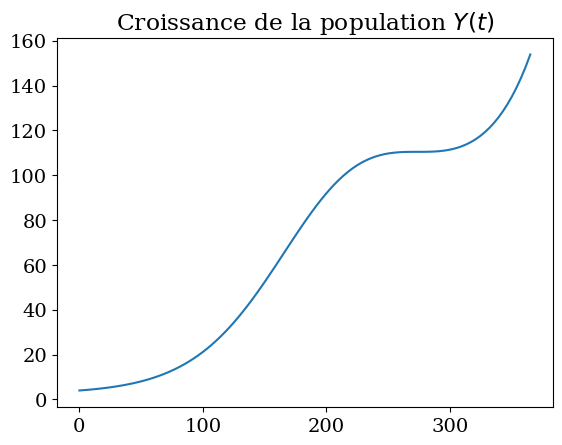

In [98]:
# parametres
a=0.01
omega=2*np.pi/365.
# solution
y0=4
T=np.linspace(0,365.0,100)
Y=odeint(F,y0,T,args=(a,omega))
plt.plot(T,Y[:,0])
plt.title("Croissance de la population $Y(t)$")

#### Analyse de la solution
au bout de combien de jours la population a-t-elle  été multipliée par 10 ?

In [71]:
out=np.where(np.abs(Y-10*y0) < 1.)
i=out[0][0]
print(" Réponse à t = {:.2f}  Y={:.2f} ~ 10*y0 avec y0={}".format(T[i],Y[i,0],Y[0]))

 Réponse à t = 132.73  Y=39.44 ~ 10*y0 avec y0=[4.]


## Généralisation: Equations d'ordre > 1

- Equations différentielles d'ordre n : 

$$ \frac{d^n y}{dt^n} = f(t,y,y',y''...y^{n-1})$$

- Transformation en un système d'EDO du $1^{er}$ ordre:

$$ \frac{d Y}{d t} = F(t,Y) $$ 

### Exemple: pendule simple

soit un pendule de masse $m$ et longueur $l$ qui fait un angle $\theta(t)$ avec la verticale

En formulation de Lagrange on a $L=T-U$ avec

$$ L = \frac{1}{m} l^2 \dot{\theta}^2, U = - m g l \cos{\theta} $$

Les équations de Lagrange :

$$ \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}} - \frac{\partial L}{\partial \theta } =0 $$

s'écrivent:

$$ m l^2 \ddot{\theta} + mgl\sin\theta = 0$$

#### oscillateur harmonique
Dans le cas de petites ocillations $y=\theta \ll 1$, on a un oscillateur harmonique de pulsation $\omega=\sqrt{k/M}$

$$\ddot{y}+\omega^2 y=0$$

$$\mbox{ avec }y(0)=y_{0},\,\dot{y}(0)=\dot{y_{0}}$$
 

- Forme  EDO du 1er ordre

$$\dot{Y} = F(Y,t)=0
\mbox{ avec } Y=\left[\begin{array}{c}
y\\
\dot{y}
\end{array}\right]\mbox{ et }F=\left[\begin{array}{c}
Y[1]\\
\omega^2 Y[0]
\end{array}\right]$$
 

- conditions initiales 

$$Y(t=0)=\left[\begin{array}{c}
\pi/10\\
0.0
\end{array}\right]
 $$

- solution analytique

$$y(t)=y_{0}\cos(\omega t)+\frac{\dot{y}_{0}}{\omega}\sin(\omega t)$$

### definition du 2nd membre: cas linéaire et non linéaire
 


In [99]:
# oscillateur harmonique
def Fl(Y,t,omega):
    """second membre linearise EDO"""
    return np.array([Y[1],-omega**2*Y[0]])
# cas non lineaire
def F(Y,t,omega):
    """second membre NL"""
    return np.array([Y[1],-omega**2*np.sin(Y[0])])

### Application: : comparaison solution linéaire et non linéaire 

Text(0.5, 1.0, 'comparaison linéaire/non linéaire')

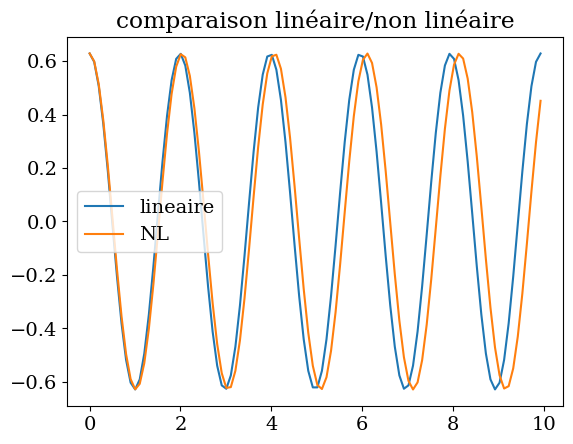

In [100]:
# parametres
L=1.0
g=10.0
omega=np.sqrt(g/L)
# integration sur 5 périodes
tmax = 5.*2*np.pi/omega
t  = np.linspace(0,tmax,100)
Y0 = np.array([np.pi/5,0.])
Yl = odeint(Fl,Y0,t,args=(omega,))
Y  = odeint(F,Y0,t,args=(omega,))
thetal=Yl[:,0]
theta =Y[:,0]
plt.plot(t,thetal,label="lineaire")
plt.plot(t,theta ,label="NL")
plt.legend()
plt.title("comparaison linéaire/non linéaire")

## Système raide


un système d'EDO est dit **raide** si certaines méthodes d'intégration (en général explicite) deviennent instables ou nécessitent des pas d'intégration excessivement petits (**stiff ODE**)

### premier exemple
On considère l'EDO non linéaire suivante:

$$ \frac{d y}{dt} = y^2 - y^3 \mbox{ avec } y(0)=\delta$$

Cette EDO due à Larry Shampine modélise l'évolution du rayon $y(t)$ de la flamme d'une allumette qui croit rapidement pour atteindre une valeur critique qui dépend de la surface $y^2$ et du volume $y^3$ de la flamme et d'un paramêtre critique $\delta$ qui est petit. Le temps d'évolution du système est de l'ordre de $2/\delta$.

Cette EDO admet une solution analytique en fonction de la fonction de Lambert $W(t)$, qui est une fonction spéciale non analytique:

$$ y(t) = \frac{1}{W((\sigma)e^{\sigma-t})} \mbox{ avec } \sigma = \frac{1}{\delta}-1$$


#### cas non raide $\delta=10^{-2}$

- résolution explicite classique

In [77]:
from time import time
# nbre d'appel de F 
ncal = 0
npas = 0
def FF(t,U):
    global ncal
    ncal += 1
    return U**2*(1-U)
def solout(t,U):
    global npas
    npas += 1
    return
# parametres
s   = 10**2-1
N   = 100
T   = np.linspace(0,2*(s+1.),N)
# solution exacte
from scipy.special import lambertw
Uex = 1./np.real(1.+lambertw(s*np.exp(s)*np.exp(-T)))
# CI
U0=1./(s+1.)
# integration RK4
debut = time()
solver = integrate.ode(FF, jac=None).\
   set_integrator('dopri5',atol=1.e-5, rtol = 1.e-4, verbosity = True)
solver.set_solout(solout)
t=0.0
solver.set_initial_value(U0, t)
UU = np.zeros(N)
UU[0]=U0
for i in range(1,N):
    if solver.successful():
        UU[i]=solver.integrate(T[i])
    else:
        print("Erreur ODE")
        exit
cpu = time() - debut
print("cpu:",cpu)
print("nombre de pas en temps: ",npas)
print("nombre de calcul de F : ",ncal)

cpu: 0.004655599594116211
nombre de pas en temps:  207
nombre de calcul de F :  754


Text(0.5, 1.0, 'Erreur')

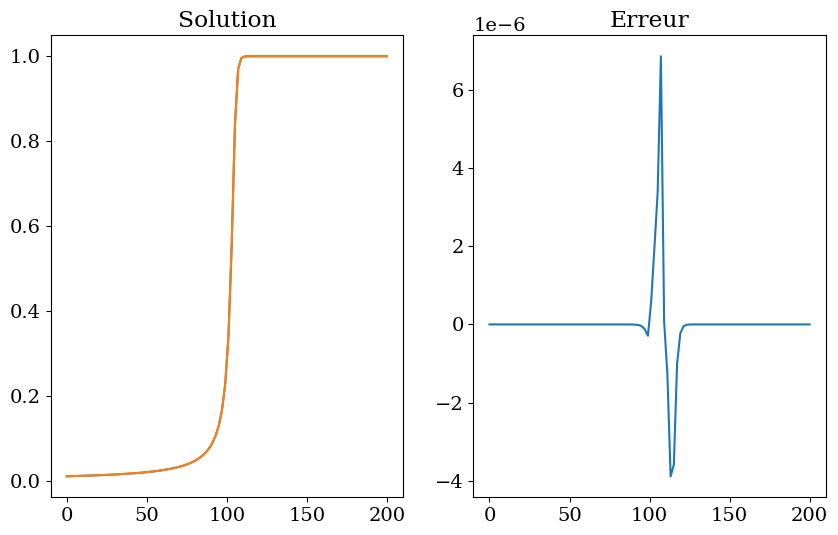

In [78]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(T,UU)
plt.plot(T,Uex)
plt.title("Solution")
plt.subplot(1,2,2)
plt.plot(T,UU-Uex)
plt.title("Erreur")

#### cas raide $\delta=10^{-4}$

- solution avec un solveur explicite RungeKutta

In [88]:
s = 10**3-1
N = 1000
npas = 0
ncal = 0
def FF(t,U):
    global ncal
    ncal += 1
    return U**2*(1-U)

def solout(t,U):
    global npas
    npas += 1
    return
# parametre
T   = np.linspace(0,2*(s+1.),N)
Uex = 1./np.real(1.+lambertw(s*np.exp(s-T)))
# CI
U0  = 1./(s+1.)
# integration RK4
debut = time()
solver = integrate.ode(FF, jac=None).\
   set_integrator('dopri5',atol=1.e-8, rtol = 1.e-6, verbosity = True)
#   set_integrator('dopri5',verbosity = True)
solver.set_solout(solout)
# CI
t= 0.0
solver.set_initial_value(U0, t)
UU    = np.zeros(N)
UU[0] = U0
for i in range(1,N):
    if solver.successful():
        UU[i]=solver.integrate(T[i])
    else:
        print("Erreur ODE")
        exit
cpu = time() - debut
print("cpu:",cpu)
print("Nbre de pas en temps  : ",npas)
print("nombre de calcul de F : ",ncal)

cpu: 0.036733150482177734
Nbre de pas en temps  :  2033
nombre de calcul de F :  7204


/tmp/ipykernel_275636/3124434095.py:16: RuntimeWarning: overflow encountered in exp
  Uex = 1./np.real(1.+lambertw(s*np.exp(s-T)))
/tmp/ipykernel_275636/3124434095.py:16: RuntimeWarning: overflow encountered in multiply
  Uex = 1./np.real(1.+lambertw(s*np.exp(s-T)))


Text(0.5, 1.0, 'Erreur')

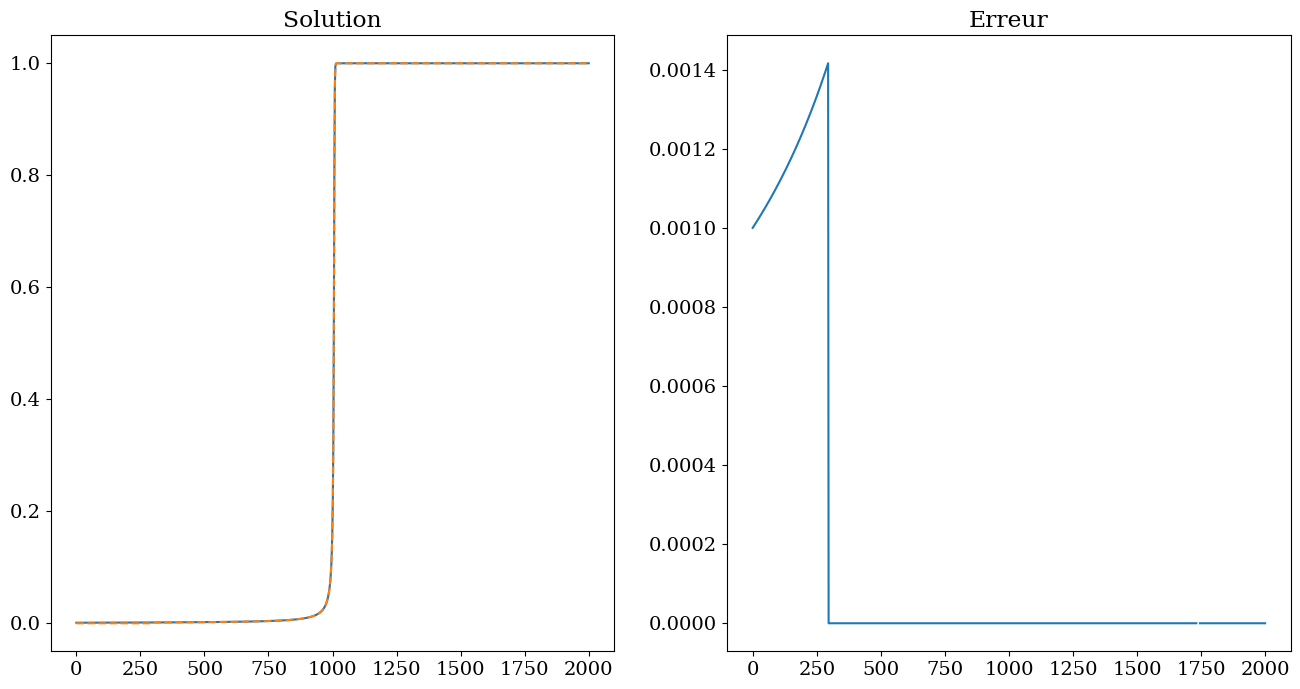

In [89]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(T,UU)
plt.plot(T,Uex,'--')
plt.title("Solution")
plt.subplot(1,2,2)
plt.plot(T,UU-Uex)
plt.title("Erreur")

#### solution avec un solver implicite BDF (lsoda)

In [90]:
# solver lsoda plus efficace (BDF implicite)
ncal = 0
njac = 0
def FF(t,U):
    global ncal
    ncal += 1
    return U**2*(1-U)

def Jac(t,U):
    global njac
    njac += 1
    return 2*U-3*U*U

debut = time()
solver = integrate.ode(FF, jac=Jac).\
   set_integrator('lsoda',atol=1.e-8, rtol = 1.e-6, ixpr=1)
t=0.0
solver.set_initial_value(U0, t)
UU1 = np.zeros(N)
UU1[0]=U0
for i in range(1,N):
    if solver.successful():
        UU1[i]=solver.integrate(T[i])
    else:
        print("Erreur ODE")
        exit
cpu = time() - debut
print("cpu:",cpu)
print("Nbre de calcul de F:",ncal)
print("Nbre de calcul de J:",njac)

 lsoda-- a switch to the bdf (stiff) method has occurred     
      at t = r1,  tentative step size h = r2,  step nst = i1 
      in above message,  i1 =       166
      in above,  r1 =  0.1023165557102D+04   r2 =  0.3159058539115D+01
cpu: 0.011642694473266602
Nbre de calcul de F: 401
Nbre de calcul de J: 4


Text(0.5, 1.0, 'Erreur')

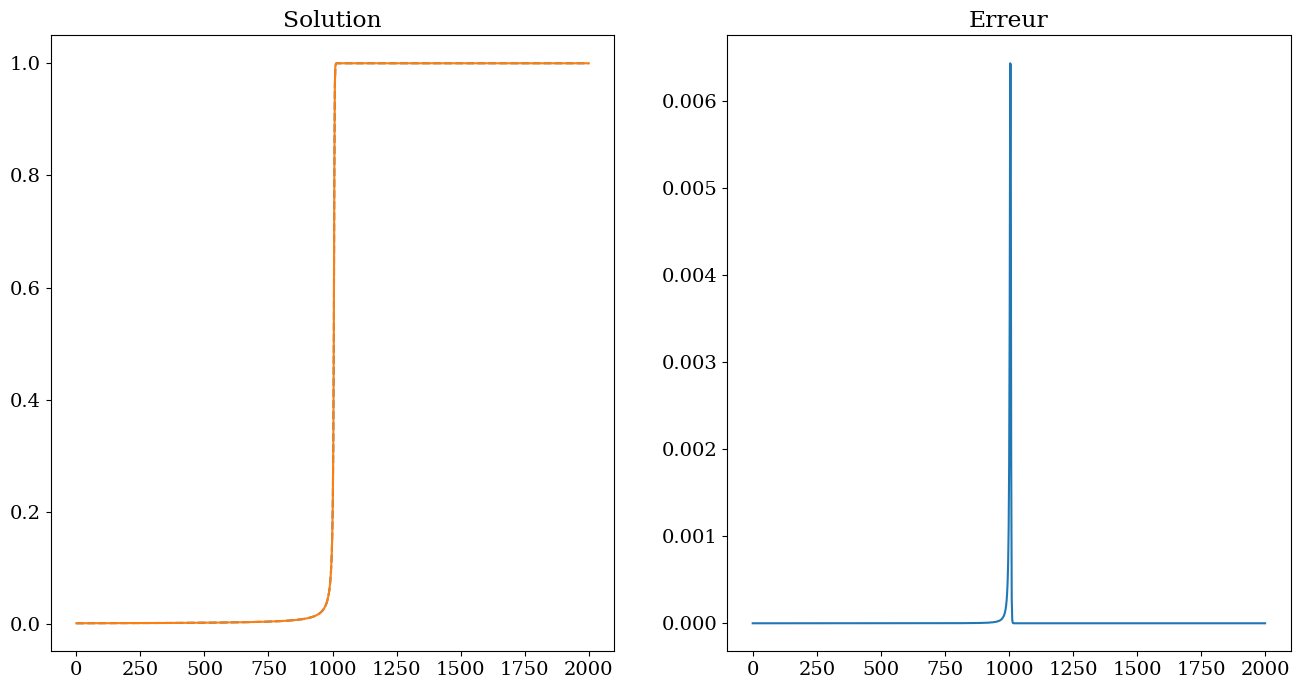

In [91]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(T,UU,'--')
plt.plot(T,UU1)
plt.title("Solution")
plt.subplot(1,2,2)
plt.plot(T,np.abs(UU-UU1))
plt.title("Erreur")
#plt.xlim(900,1100)

On constate que le solveur implicite permet de résoudre  ce problème raide avec un nombre d'itérations et d'évaluations ($\approx 700$) de la fonction $F$ beaucoup plus faible que le solveur explicite RK45 ($\approx 7000$), ce qui le rend 4 fois plus efficace (i.e. 4 fois plus rapide en temps cpu).

### 2nd exemple: oscillateur de van der pool
oscillateur non linéaire régit par

$$ \frac{d^2y}{dt^2} - \mu (1-y^2)\frac{dy}{dt} + y =0 $$

- pour $\mu=0$ oscillateur harmonique
- pour $\mu$ petit système non raide
- pour $\mu$ grand système raide

Transformation en un système d'EDO du 1er ordre

$$ \frac{dY}{dt} = F(t,Y) $$

$$\mbox{ avec } Y=\left[ \begin{array}{c} Y_1=y \\ Y_2=\frac{dy}{dt }\\ \end{array}\right] \mbox{ et } F = \left[ \begin{array}{c} Y_2 \\ \mu (1-Y_1^2) Y_2 - Y1\\ \end{array}\right]$$

#### cas non raide $\mu=1$

cpu: 0.009839057922363281
Nbre de calcul de F : 2540
Nbre de pas en temps: 583


Text(0.5, 1.0, 'solution y(t)')

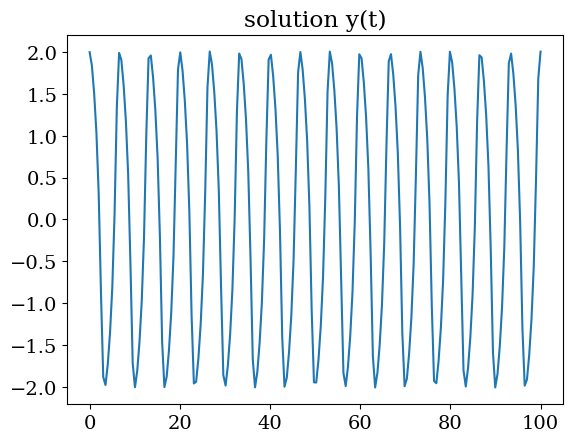

In [101]:
ncal = 0
npas  = 0
def F(t,Y,mu):
    global ncal
    ncal += 1
    dY = np.array([Y[1],mu*(1-Y[0]**2)*Y[1]-Y[0]])
    return dY

def solout(t,Y):
    global npas
    npas += 1
    return
# cas non raide
mu = 1.0
N  = 200
tmax = 100.
debut = time()
solver = integrate.ode(F, jac=None).\
   set_integrator('dopri5',atol=1.e-6, rtol = 1.e-3, verbosity = True)
solver.set_solout(solout)
# CI
t = 0.0
U0 = np.array([2. , 0.])
solver.set_initial_value(U0, t).set_f_params(mu)
T = np.linspace(0,tmax,N)
U = np.zeros((N,2))
U[0,:]=U0
for i in range(1,N):
    if solver.successful():
        U[i] = solver.integrate(T[i])
    else:
        print("Erreur ODE it=",i)
        break
cpu = time() - debut
print("cpu:",cpu)
print("Nbre de calcul de F :",ncal)
print("Nbre de pas en temps:",npas)
plt.plot(T,U[:,0])
plt.title("solution y(t)")

#### cas raide $\mu=1000$

- solution avec solveur explicite RungeKutta 
- ne converge pas !!!
##### solveur expliciteRK (diverge)

Erreur ODE it= 2
cpu: 0.008898735046386719
Nbre de calcul de F : 3008
Nbre de pas en temps: 500


/home/buffat/venvs/jupyter/lib/python3.10/site-packages/scipy/integrate/_ode.py:1179: UserWarning: dopri5: larger nsteps is needed
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


Text(0.5, 1.0, 'solution y(t)')

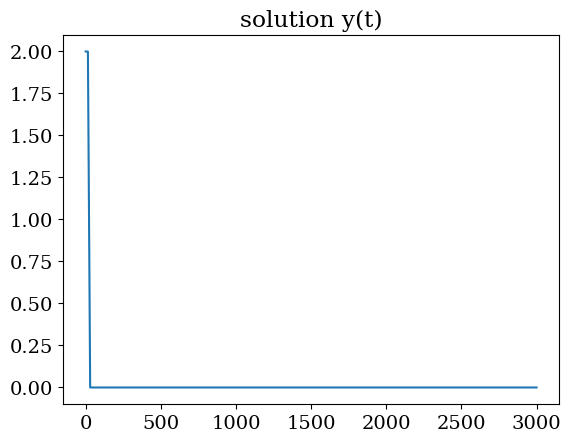

In [93]:
ncal  = 0
npas  = 0
def F(t,Y,mu):
    global ncal
    ncal += 1
    dY = np.array([Y[1],mu*(1-Y[0]**2)*Y[1]-Y[0]])
    return dY

def solout(t,U):
    global npas
    npas += 1
    return
# cas raide
mu = 1000.0
N  = 200
tmax = 3000.
debut = time()
solver = integrate.ode(F, jac=None).\
   set_integrator('dopri5',atol=1.e-6, rtol = 1.e-3, verbosity = True)
solver.set_solout(solout)
# CI
t = 0.0
U0 = np.array([2. , 0.])
solver.set_initial_value(U0, t).set_f_params(mu)
T = np.linspace(0,tmax,N)
U = np.zeros((N,2))
U[0,:]=U0
for i in range(1,N):
    if solver.successful():
        U[i,:] = solver.integrate(T[i])
    else:
        print("Erreur ODE it=",i)
        break
cpu = time() - debut
print("cpu:",cpu)
print("Nbre de calcul de F :",ncal)
print("Nbre de pas en temps:",npas)
plt.plot(T,U[:,0])
plt.title("solution y(t)")

Pour ce cas, le solveur explicite ne converge pas !!!

##### solveur implicite BDF (lsoda)

 lsoda-- a switch to the bdf (stiff) method has occurred     
      at t = r1,  tentative step size h = r2,  step nst = i1 
      in above message,  i1 =        21
      in above,  r1 =  0.3305202064385D-02   r2 =  0.1916670395710D-02
 lsoda-- a switch to the adams (nonstiff) method has occurred
      at t = r1,  tentative step size h = r2,  step nst = i1 
      in above message,  i1 =       181
      in above,  r1 =  0.8048350883061D+03   r2 =  0.2655460477849D-03
 lsoda-- a switch to the bdf (stiff) method has occurred     
      at t = r1,  tentative step size h = r2,  step nst = i1 
      in above message,  i1 =       282
      in above,  r1 =  0.8048500926435D+03   r2 =  0.1137782784124D-02
 lsoda-- a switch to the adams (nonstiff) method has occurred
      at t = r1,  tentative step size h = r2,  step nst = i1 
      in above message,  i1 =       442
      in above,  r1 =  0.1609557814764D+04   r2 =  0.2645038643414D-03
 lsoda-- a switch to the bdf (stiff) method has occurred    

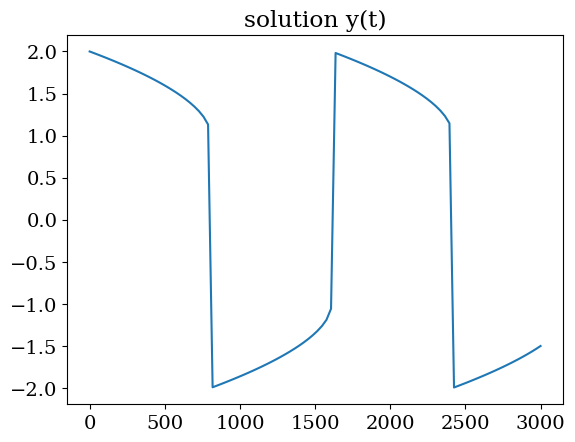

In [94]:
# solver lsoda plus efficace (BDF implicite)
ncal = 0
njac = 0
mu   = 1000.0
def FF(t,Y,mu):
    global ncal
    ncal += 1
    dY = np.array([Y[1] , mu*(1-Y[0]**2)*Y[1]-Y[0]])
    return dY

def Jac(t,Y,mu):
    global njac
    njac += 1
    dFdY = np.array([[ 0                , 1.],
                     [-2*mu*Y[0]*Y[1]-1.,mu*(1-Y[0]**2)]])
    return dFdY

N = 100
T = np.linspace(0,tmax,N)
debut = time()
solver = integrate.ode(FF, jac=Jac).\
   set_integrator('lsoda',atol=1.e-5, rtol = 1.e-4, ixpr=1)
t = 0.0
U0 = np.array([2. , 0.])
solver.set_f_params(mu)
solver.set_jac_params(mu)
solver.set_initial_value(U0, t)
UU = np.zeros((N,2))
UU[0,:]=U0
for i in range(1,N):
    if solver.successful():
        UU[i,:] = solver.integrate(T[i])
    else:
        print("Erreur ODE it=",i)
        exit
cpu = time() - debut
print("cpu:",cpu)
print("Nbre de calcul de F:",ncal)
print("Nbre de calcul de J:",njac)
plt.plot(T,UU[:,0])
plt.title("solution y(t)");

Ce solveur **lsoda** est très efficace car il sait permuter 
entre un solveur explicite dans les zones non raides et un solveur implicite dans les zones raides
pour obtenir une bonne approximation de la solution

## FIN de la leçon